In [2705]:
import numpy as np
#import pylandau
from scipy.stats import moyal
from scipy.stats import norm
from matplotlib import pyplot as plt
plt.style.use('tdrstyle.mplstyle')

In [2706]:
#First energy loss in 3m of iron, as per PDG. Estimate peak offset and scale from PDG plot
MuonEinc = 1000
ELossAvFe = 24
PeakOffsetFe = ELossAvFe/2.875
ScaleLossFe = 2.5
xmax = 25.0
xmin = -5
dx = 0.01
nx = (xmax-xmin)/dx

In [2707]:
x_landau = np.arange(xmin, xmax, dx)
#y_landau = pylandau.landau(x_landau)

In [2708]:
#plt.plot(x_landau, y_landau, 'b')
#plt.title('Landau Dist, mu=0, c=Pi/2')
#plt.show()

In [2709]:
#ELossY = y_landau
ELossX = x_landau*ScaleLossFe+PeakOffsetFe
MuonP = MuonEinc-ELossX

In [2710]:
#plt.plot(ELossX, ELossY, 'b')

In [2711]:
#plt.plot(MuonP, ELossY, 'b')
#plt.title('1 TeV Muon after 3m Iron')
#plt.show()

In [2712]:
# Now Tungsten 6m
MuonEinc = 1000
ELossAvW = 116
PeakOffsetW = ELossAvW/2.875
ScaleLossW = ScaleLossFe*ELossAvW/ELossAvFe

In [2713]:
ELossX = x_landau*ScaleLossW+PeakOffsetW
MuonP = MuonEinc-ELossX

In [2714]:
#plt.plot(MuonP, ELossY, 'b')
#plt.title('1 TeV Muon after 6m Tungsten')
#plt.show()

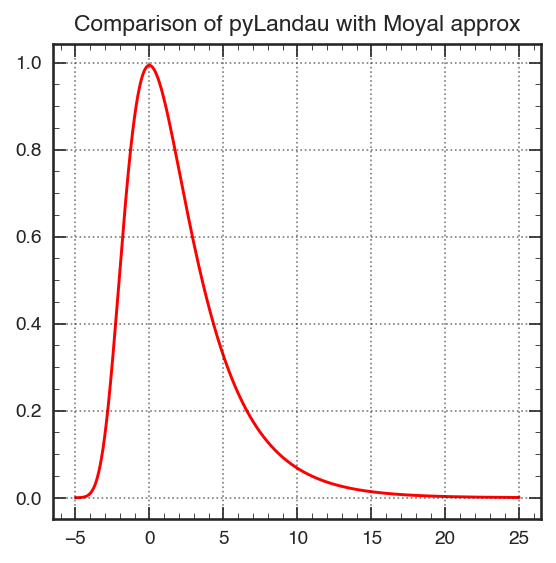

In [2715]:
plt.plot(x_landau, moyal.pdf(x_landau,0,1.5708)*6.45,'r')
#plt.plot(x_landau, y_landau, 'b')
plt.title('Comparison of pyLandau with Moyal approx')
plt.show()

In [2716]:
ELossX = x_landau*ScaleLossFe+PeakOffsetFe
MuonP = MuonEinc-ELossX
ELossY = moyal.pdf(x_landau,0,1.5704)*6.45

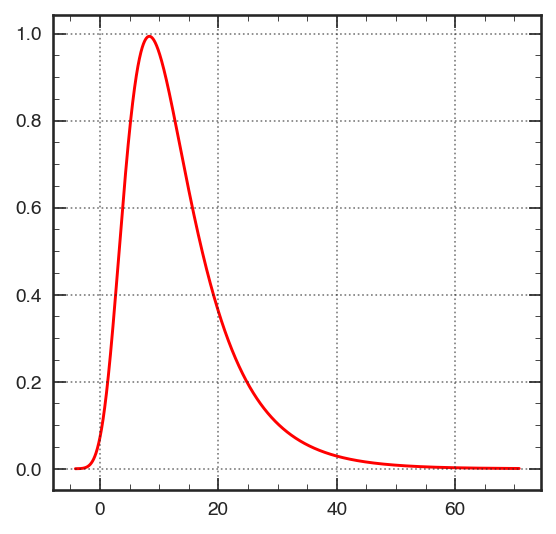

In [2717]:
plt.plot(ELossX, ELossY, 'r')

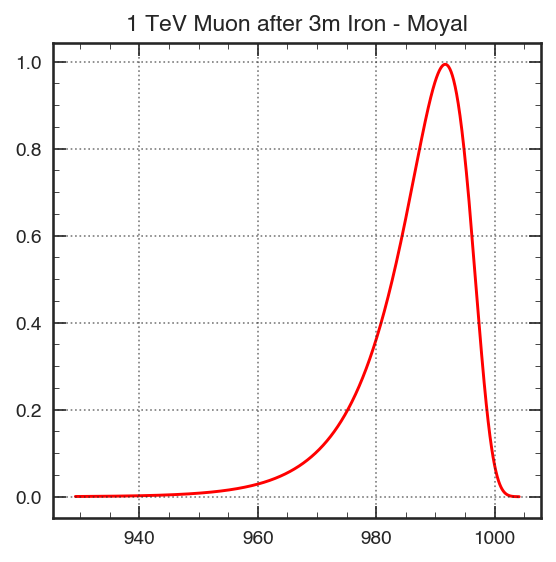

In [2718]:
plt.plot(MuonP, ELossY, 'r')
plt.title('1 TeV Muon after 3m Iron - Moyal')
plt.show()

In [2719]:
# Now Tungsten 6m
MuonEinc = 1000
ELossAvW = 116
PeakOffsetW = ELossAvW/2.875
ScaleLossW = ScaleLossFe*ELossAvW/ELossAvFe

In [2720]:
ELossX = x_landau*ScaleLossW+PeakOffsetW
MuonP = MuonEinc-ELossX

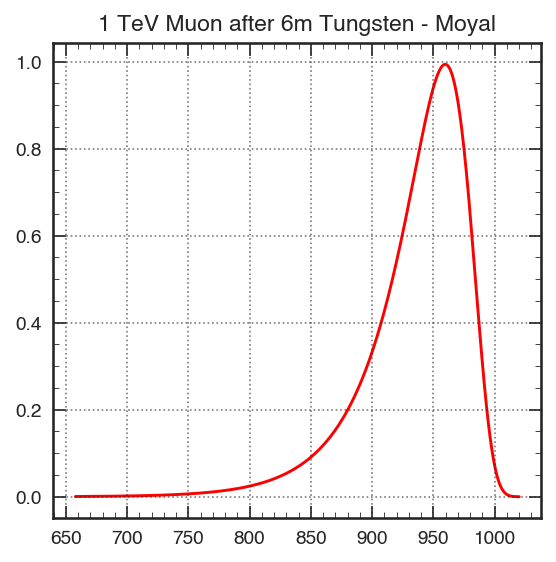

In [2721]:
plt.plot(MuonP, ELossY, 'r')
plt.title('1 TeV Muon after 6m Tungsten - Moyal')
plt.show()

In [2722]:
# MC Trials
Ntrial = 4000

In [2723]:
rv = moyal()
r = moyal.rvs(loc=PeakOffsetW, scale=1.5704*ScaleLossW, size=Ntrial)

In [2724]:
Emuon = MuonEinc-r
lower =500
upper = 1000
fit_i = 920
fit_f = 1000
fit = Emuon[(Emuon >= fit_i) & (Emuon <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Emuon)

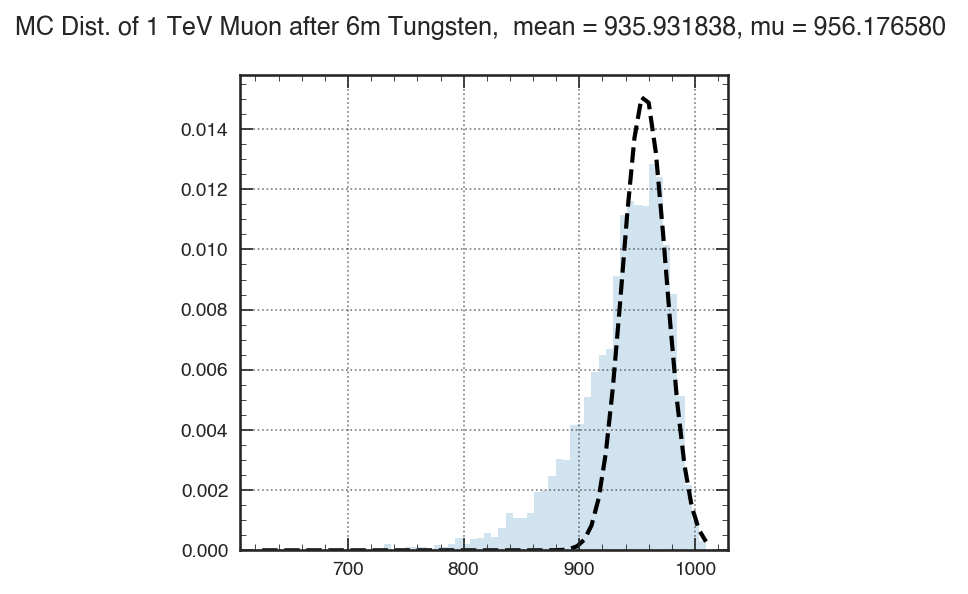

In [2725]:
n, bins, patches = plt.hist(Emuon, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('MC Dist. of 1 TeV Muon after 6m Tungsten,  mean = %f, mu = %f \n' %(mean,mu), fontsize=12)
plt.show()
Eloss1000 = MuonEinc - mu

In [2726]:
def Q2Lepton(E, Theta, Elep, Ehad):
    return 2*E*Elep*(1+np.cos(Theta))

In [2727]:
def YLepton(E, Theta, Elep, Ehad):
    return 1 - E/(2*Elep)*(1-np.cos(Theta))

In [2728]:
def Eta(Theta):
    return -np.log(np.tan(Theta/2))

In [2729]:
Q2true = Q2Lepton(900., 3.136635, 1000, 275)

In [2730]:
Ytrue = YLepton(900., 3.136635, 1000, 275)

In [2731]:
# Let's subtract energy loss but correct back by the most probably energy loss (so smearing only)
Escatt900 = 900-r + Eloss1000

In [2732]:
# Calculate Q2 from random energy loss, but not yet any smearing from multiple scattering or from measured muon momentum...
Q2scatt900 = Q2Lepton(Escatt900,3.136635, 1000, 275)

In [2733]:
lower =15
upper = 25
fit_i = 21
fit_f = 25.0
fit = Q2scatt900[(Q2scatt900 >= fit_i) & (Q2scatt900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt900)


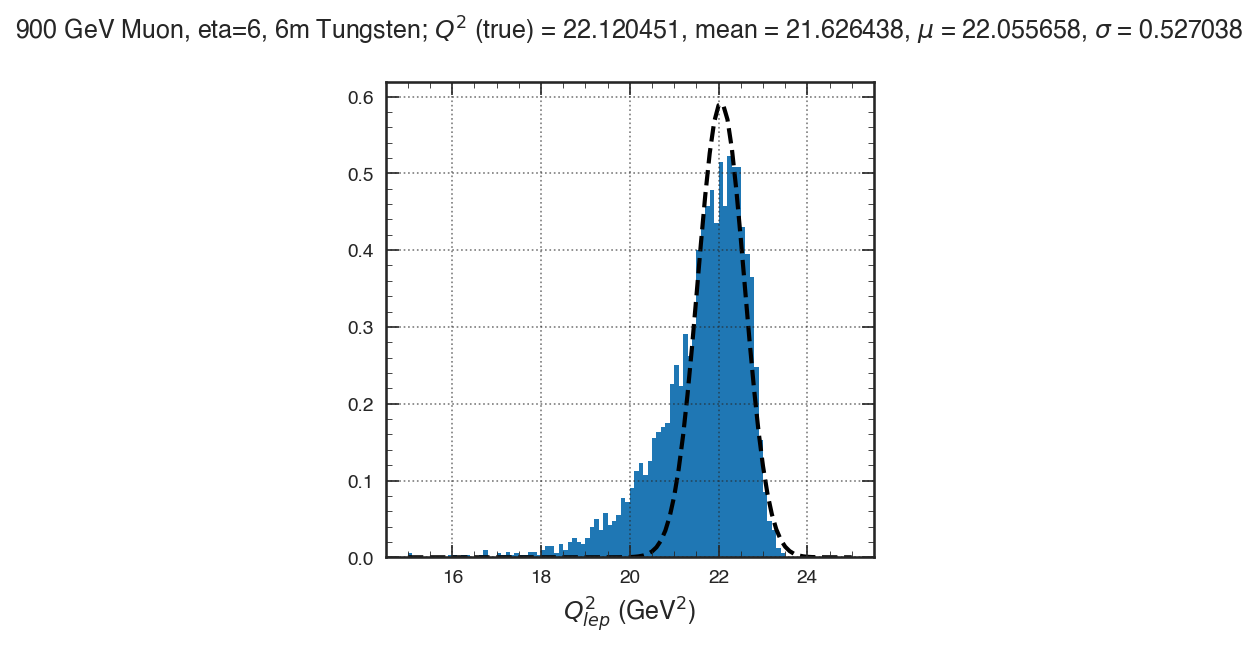

In [2734]:
n, bins, patches = plt.hist(Q2scatt900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon, eta=6, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [2735]:
Q2true = Q2Lepton(500., 3.136635, 1000, 275)

In [2736]:
Ytrue = YLepton(500., 3.136635, 1000, 275)

In [2737]:
# Assume same energy loss, but it will be a bit less as further down ionization curve. ~25% ?
# let's correct back most probably Eloss
Escatt500 = 500-r + Eloss1000

In [2738]:
Q2scatt500 = Q2Lepton(Escatt500,3.136635, 1000, 275)

In [2739]:
lower =5
upper = 15
fit_i = 11
fit_f = 15.0
fit = Q2scatt500[(Q2scatt500 >= fit_i) & (Q2scatt500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt500)


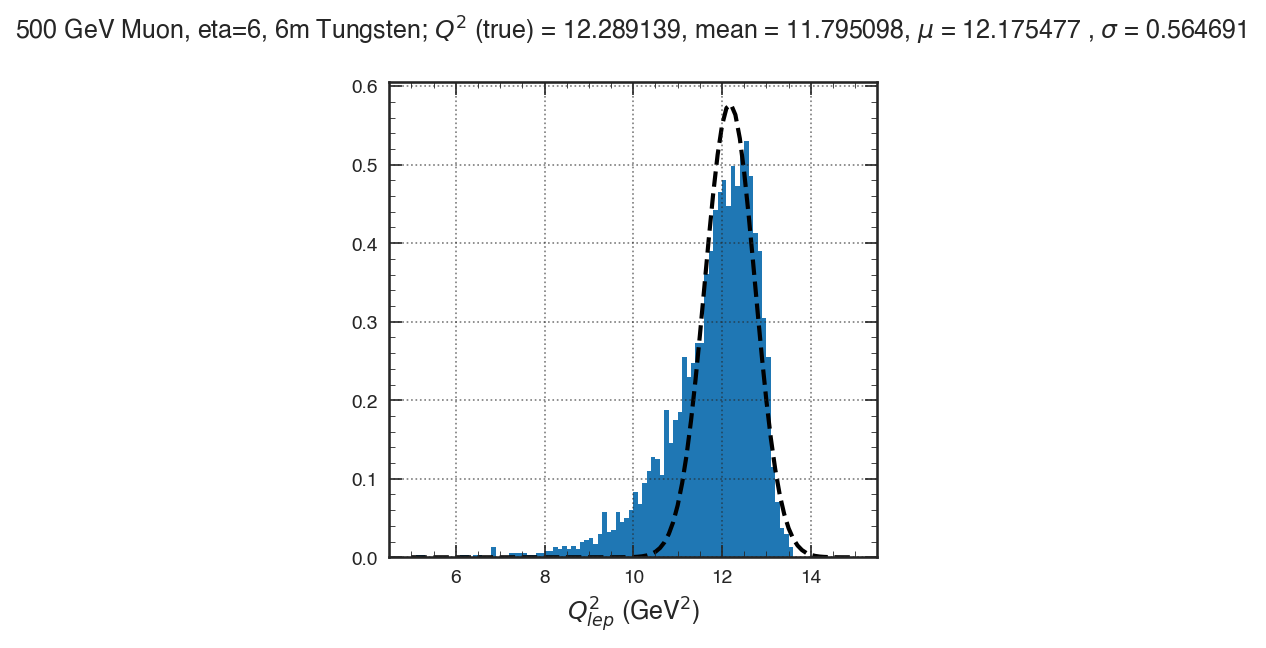

In [2740]:
n, bins, patches = plt.hist(Q2scatt500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon, eta=6, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [2741]:
# Now multiple scattering in 6m of Tungsten

In [2742]:
SigmaTheta900 = 0.000802392 # 900 GeV

In [2743]:
SigmaTheta500 = 0.001444305 # 500 GeV

In [2744]:
Th900 = np.random.normal(3.136635, SigmaTheta900, Ntrial)

In [2745]:
Th500 = np.random.normal(3.136635, SigmaTheta500, Ntrial)

In [2746]:
eta500 = Eta(Th500)
eta900 = Eta(Th900)

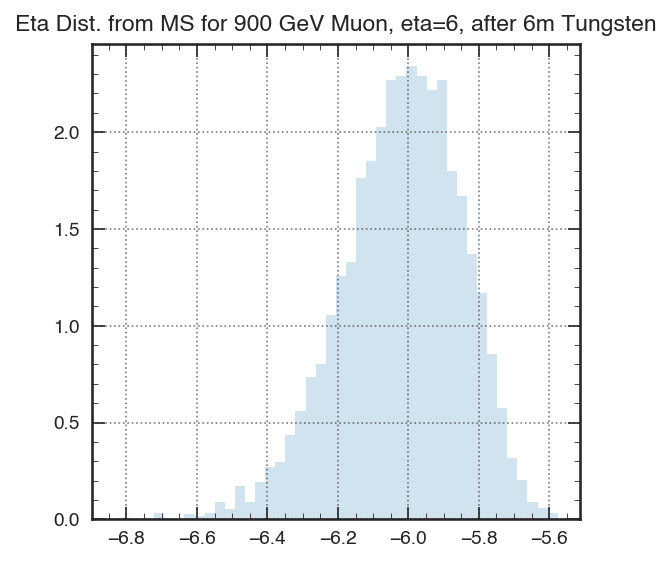

In [2747]:
plt.hist(eta900, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Eta Dist. from MS for 900 GeV Muon, eta=6, after 6m Tungsten')
plt.show()

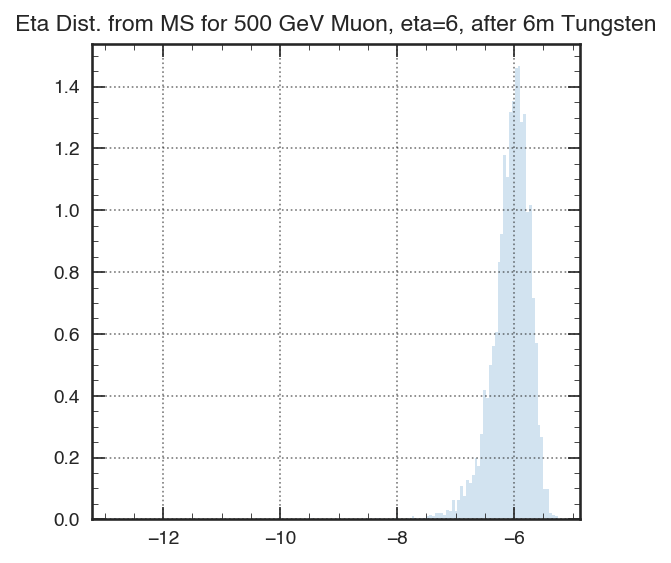

In [2748]:
plt.hist(eta500, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Eta Dist. from MS for 500 GeV Muon, eta=6, after 6m Tungsten')
plt.show()

In [2749]:
Q2true = Q2Lepton(900., 3.136635, 1000, 275)
Q2plus = Q2Lepton(900., 3.136635-2.*SigmaTheta900, 1000, 275)
Q2minus = Q2Lepton(900., 3.136635+2.*SigmaTheta900, 1000, 275)
Ytrue = YLepton(900., 3.136635, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)


Q2 true = 22.120450897800126  Ytrue =  0.1000055301127244
2 sigma MS window: Q2- =  10.117551559352123  Q2+ = 38.75888930984228


In [2750]:
# Calculate Q2 with random energy loss and multiple scattering, but no smearing of measured muon momentum...
Q2scatt900 = Q2Lepton(Escatt900,Th900, 1000, 275)

In [2751]:
lower =0
upper = 50
fit_i = 5
fit_f = 30.0
fit = Q2scatt900[(Q2scatt900 >= fit_i) & (Q2scatt900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt900)

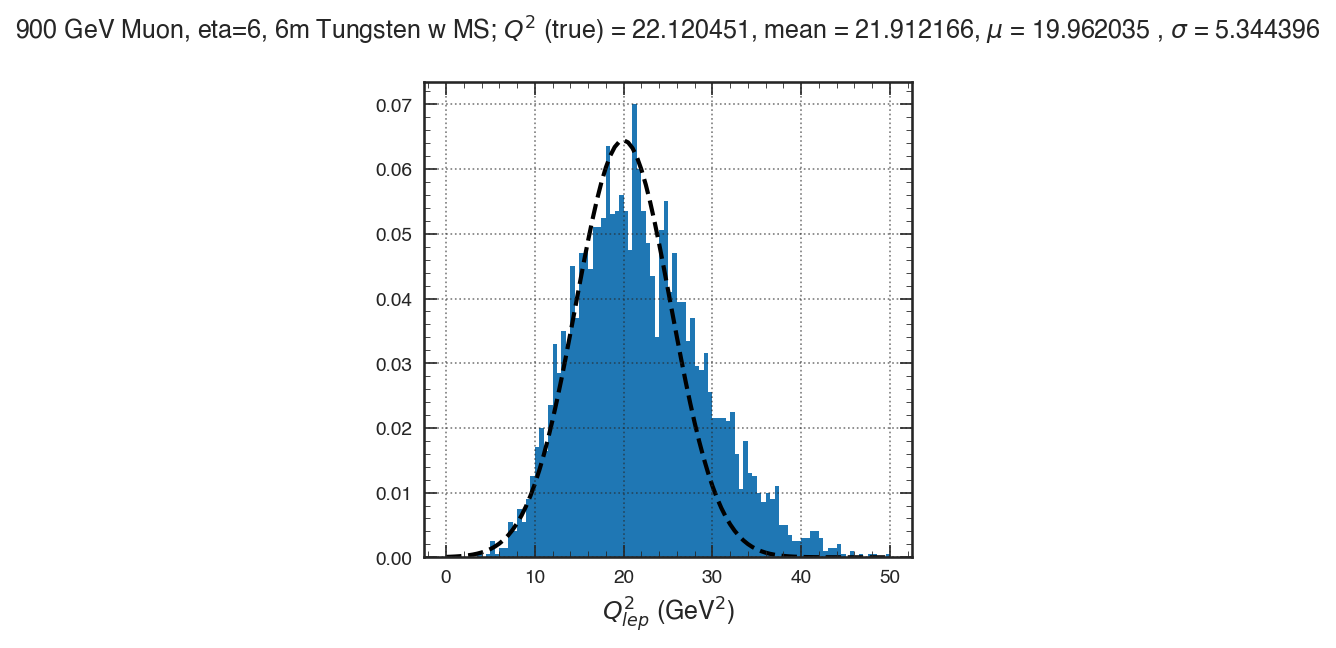

In [2752]:
n, bins, patches = plt.hist(Q2scatt900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon, eta=6, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [2753]:
Q2true = Q2Lepton(500., 3.136635, 1000, 275)
Q2plus = Q2Lepton(500., 3.136635-2.*SigmaTheta500, 1000, 275)
Q2minus = Q2Lepton(500., 3.136635+2.*SigmaTheta500, 1000, 275)
Ytrue = YLepton(500., 3.136635, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)


Q2 true = 12.289139387666737  Ytrue =  0.500003072284847
2 sigma MS window: Q2- =  2.140469924638566  Q2+ = 30.78176823945178


In [2754]:
Q2scatt500 = Q2Lepton(Escatt500,Th500, 1000, 275)

In [2755]:
lower =0
upper = 50
fit_i = 0
fit_f = 20.0
fit = Q2scatt500[(Q2scatt500 >= fit_i) & (Q2scatt500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt500)

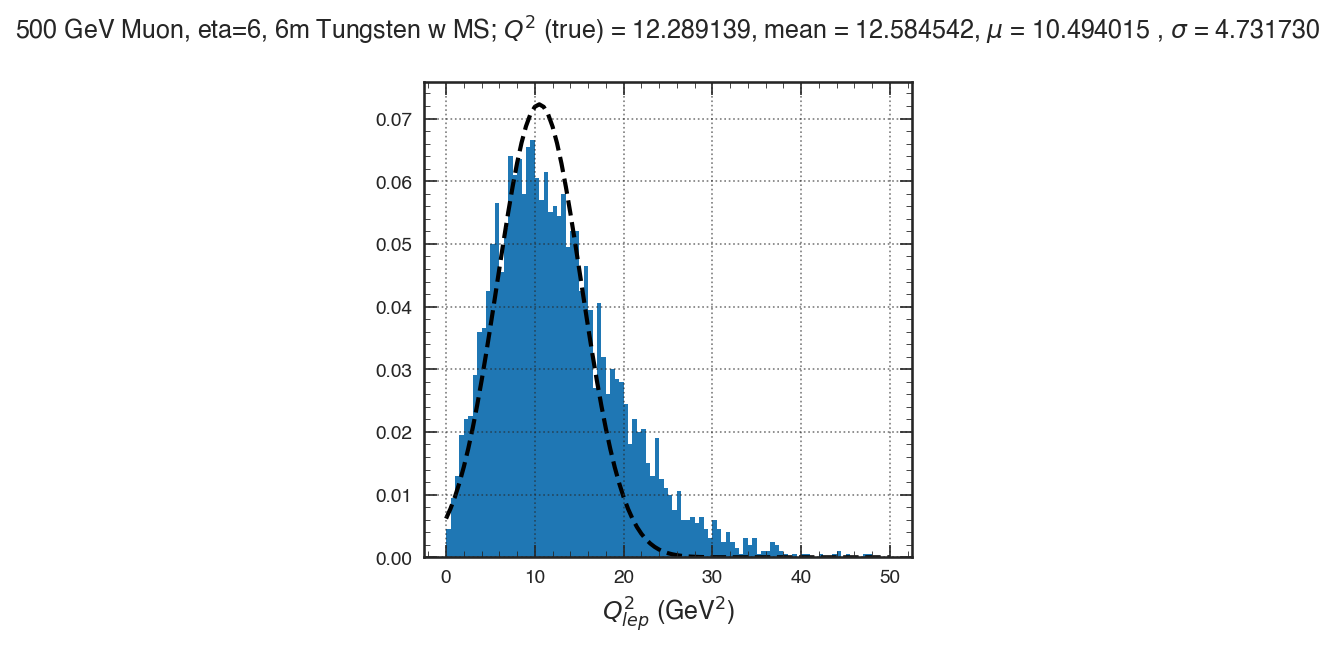

In [2756]:
n, bins, patches = plt.hist(Q2scatt500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon, eta=6, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [2757]:
# Angle smearing seems to have large impact than energy loss and smearing!

In [2758]:
# eta = 5:
Q2true = Q2Lepton(900., 3.12812, 1000, 275)
Q2plus = Q2Lepton(900., 3.12812-2.*SigmaTheta900, 1000, 275)
Q2minus = Q2Lepton(900., 3.12812+2.*SigmaTheta900, 1000, 275)
Ytrue = YLepton(900., 3.12812, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)

Q2 true = 163.35868428434264  Ytrue =  0.10004083967107114
2 sigma MS window: Q2- =  126.7602079206398  Q2+ = 204.59233598619787


In [2759]:
Th900 = np.random.normal(3.12812, SigmaTheta900, Ntrial)
Th500 = np.random.normal(3.12812, SigmaTheta500, Ntrial)
eta500 = Eta(Th500)
eta900 = Eta(Th900)

In [2760]:
Q2scatt900 = Q2Lepton(Escatt900,Th900, 1000, 275)
Q2scatt500 = Q2Lepton(Escatt500,Th500, 1000, 275)

In [2761]:
lower =75
upper = 250
fit_i = 100
fit_f = 200.0
fit = Q2scatt900[(Q2scatt900 >= fit_i) & (Q2scatt900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt900)

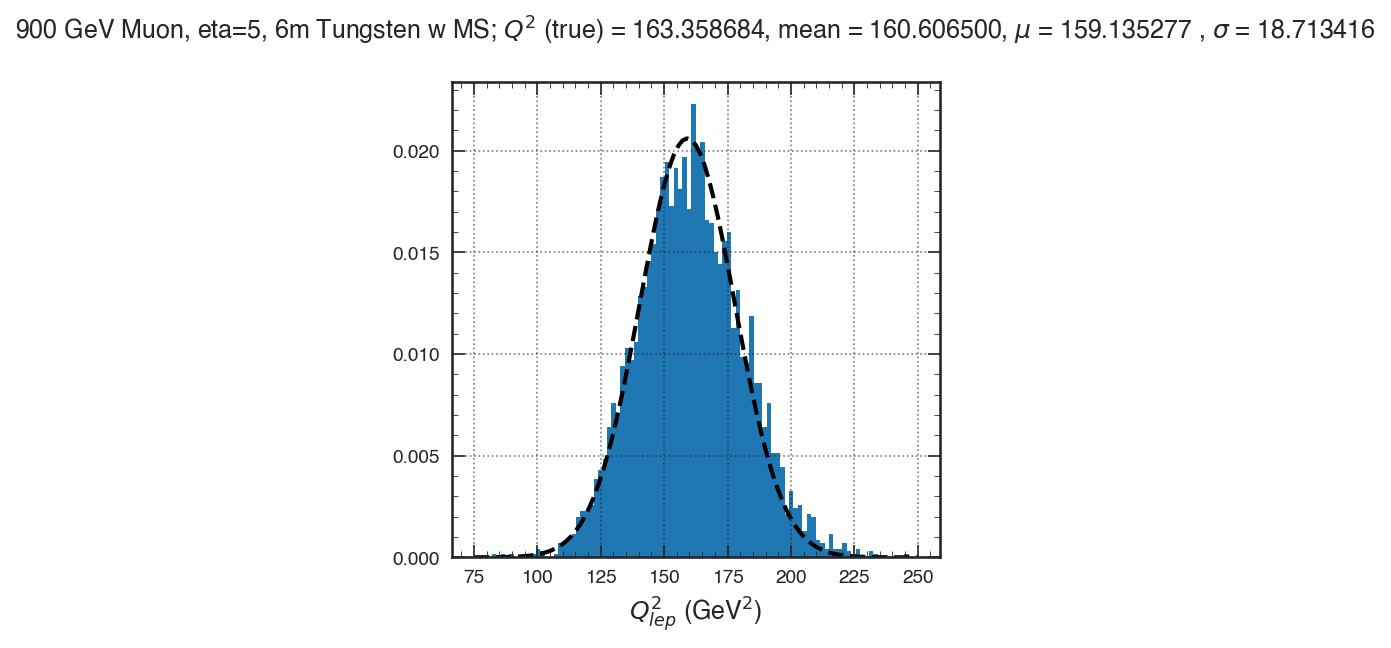

In [2762]:
n, bins, patches = plt.hist(Q2scatt900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon, eta=5, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [2763]:
Q2true = Q2Lepton(500., 3.12812, 1000, 275)
Q2plus = Q2Lepton(500., 3.12812-2.*SigmaTheta500, 1000, 275)
Q2minus = Q2Lepton(500., 3.12812+2.*SigmaTheta500, 1000, 275)
Ytrue = YLepton(500., 3.12812, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)


Q2 true = 90.75482460241258  Ytrue =  0.5000226887061506
2 sigma MS window: Q2- =  56.01046648540109  Q2+ = 133.84248738557147


In [2764]:
lower =0
upper = 150
fit_i = 25
fit_f = 125.0
fit = Q2scatt500[(Q2scatt500 >= fit_i) & (Q2scatt500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt500)

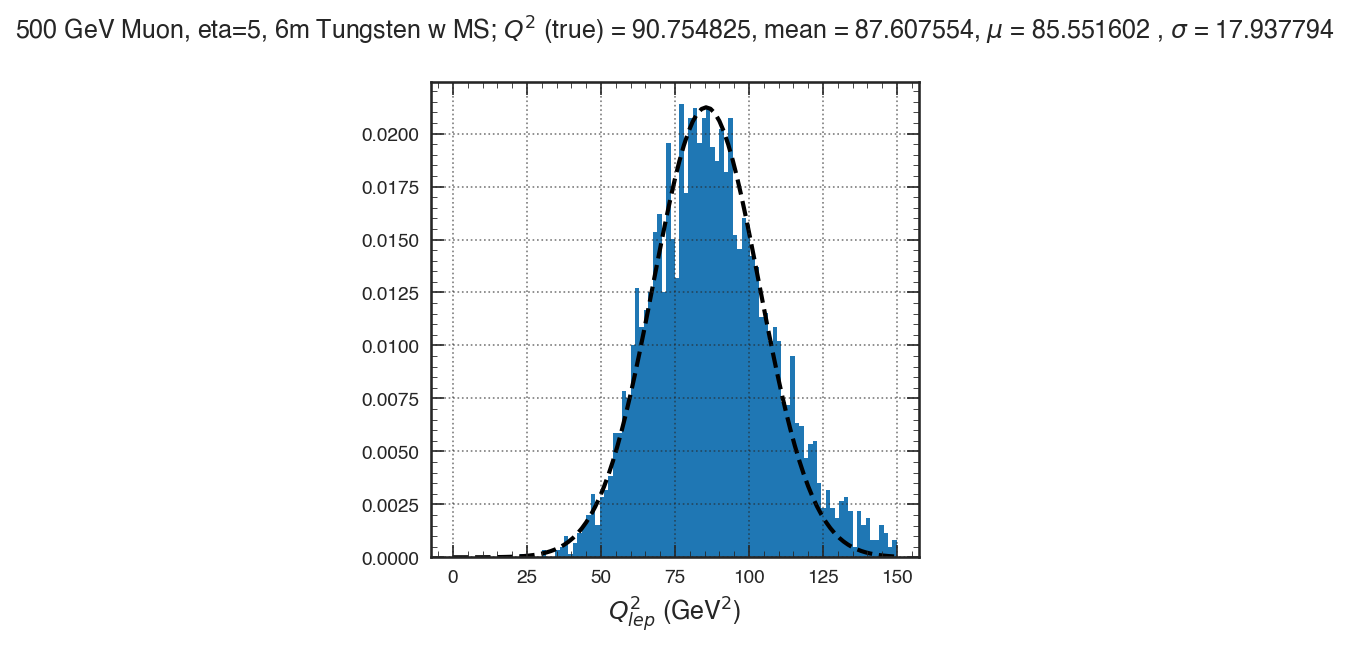

In [2765]:
n, bins, patches = plt.hist(Q2scatt500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon, eta=5, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [2766]:
# eta = 4:
Q2true = Q2Lepton(900., 3.1050, 1000, 275)
Q2plus = Q2Lepton(900., 3.10502-2.*SigmaTheta900, 1000, 275)
Q2minus = Q2Lepton(900., 3.1050+2.*SigmaTheta900, 1000, 275)
Ytrue = YLepton(900., 3.1050, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)

Q2 true = 1204.9855995168946  Ytrue =  0.10030124639987925
2 sigma MS window: Q2- =  1101.6235302464538  Q2+ = 1311.6057479420017


In [2767]:
Th900 = np.random.normal(3.1050, SigmaTheta900, Ntrial)
Th500 = np.random.normal(3.1050, SigmaTheta500, Ntrial)
eta500 = Eta(Th500)
eta900 = Eta(Th900)

In [2768]:
Q2scatt900 = Q2Lepton(Escatt900,Th900, 1000, 275)
Q2scatt500 = Q2Lepton(Escatt500,Th500, 1000, 275)

In [2769]:
lower =800
upper = 1500
fit_i = 1050
fit_f = 1300.0
fit = Q2scatt900[(Q2scatt900 >= fit_i) & (Q2scatt900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt900)

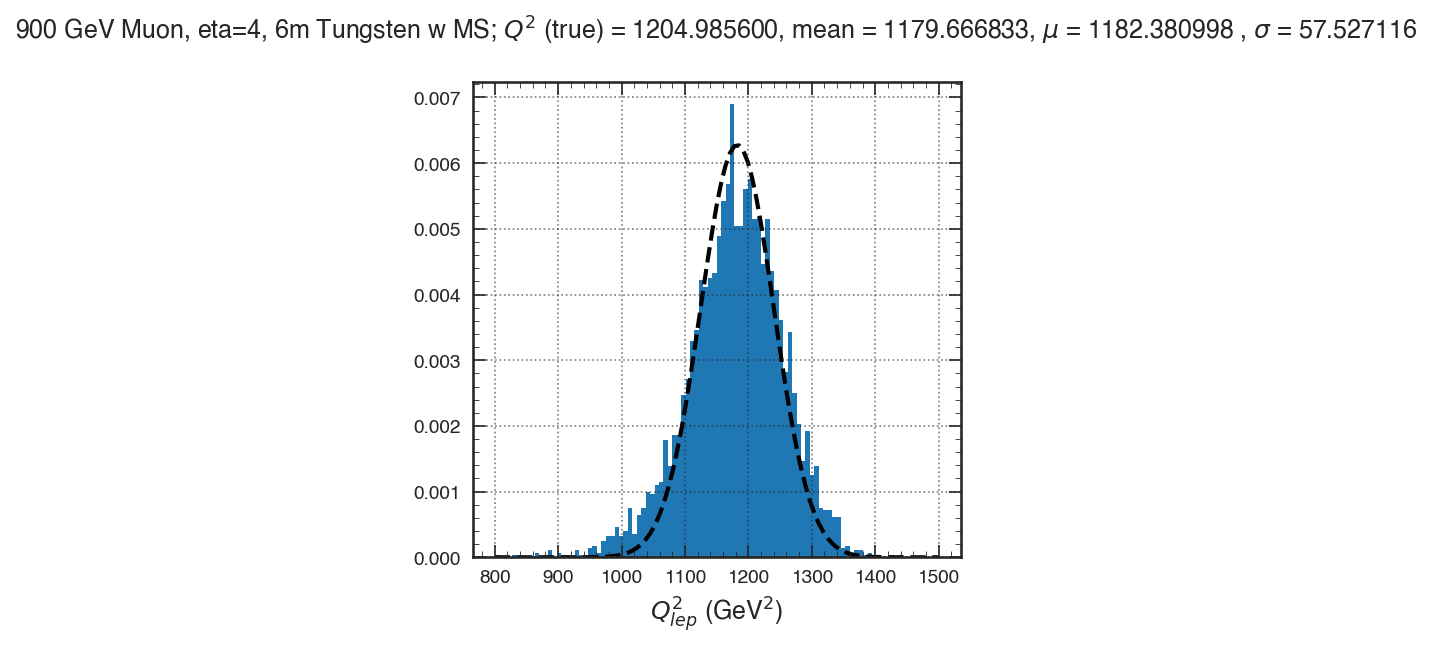

In [2770]:
n, bins, patches = plt.hist(Q2scatt900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon, eta=4, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [2771]:
Q2true = Q2Lepton(500., 3.1050, 1000, 275)
Q2plus = Q2Lepton(500., 3.1050-2.*SigmaTheta500, 1000, 275)
Q2minus = Q2Lepton(500., 3.1050+2.*SigmaTheta500, 1000, 275)
Ytrue = YLepton(500., 3.11050, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)


Q2 true = 669.4364441760525  Ytrue =  0.5001208344031833
2 sigma MS window: Q2- =  567.9275120653582  Q2+ = 779.283852397783


In [2772]:
lower =300
upper = 900
fit_i = 500
fit_f = 750
fit = Q2scatt500[(Q2scatt500 >= fit_i) & (Q2scatt500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt500)

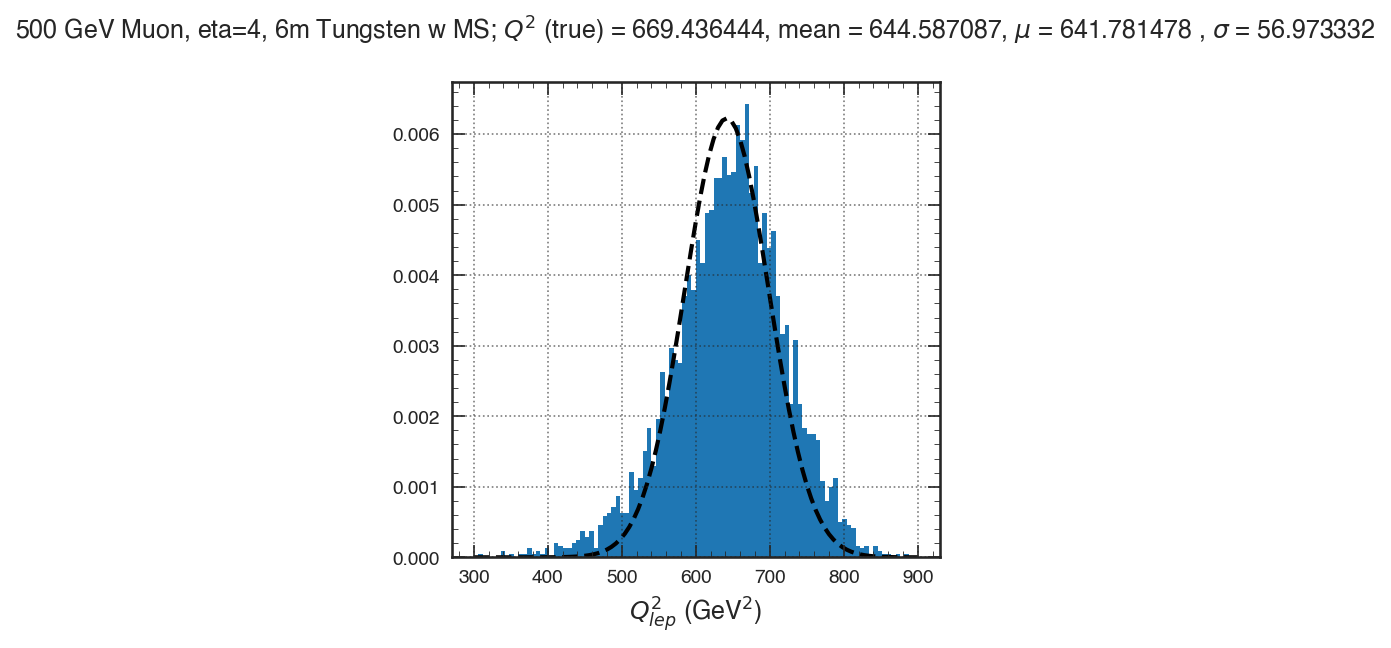

In [2773]:
n, bins, patches = plt.hist(Q2scatt500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon, eta=4, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [2774]:
# eta = 3:
Q2true = Q2Lepton(900., 3.0421, 1000, 275)
Q2plus = Q2Lepton(900., 3.0421-2.*SigmaTheta900, 1000, 275)
Q2minus = Q2Lepton(900., 3.0421+2.*SigmaTheta900, 1000, 275)
Ytrue = YLepton(900., 3.0421, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)

Q2 true = 8901.562780466988  Ytrue =  0.10222539069511671
2 sigma MS window: Q2- =  8616.94755599096  Q2+ = 9190.790676512517


In [2775]:
Th900 = np.random.normal(3.0421, SigmaTheta900, Ntrial)
Th500 = np.random.normal(3.0421, SigmaTheta500, Ntrial)
eta500 = Eta(Th500)
eta900 = Eta(Th900)

In [2776]:
Q2scatt900 = Q2Lepton(Escatt900,Th900, 1000, 275)
Q2scatt500 = Q2Lepton(Escatt500,Th500, 1000, 275)

In [2777]:
lower =6000
upper = 10000
fit_i = 8400
fit_f = 9400.0
fit = Q2scatt900[(Q2scatt900 >= fit_i) & (Q2scatt900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt900)

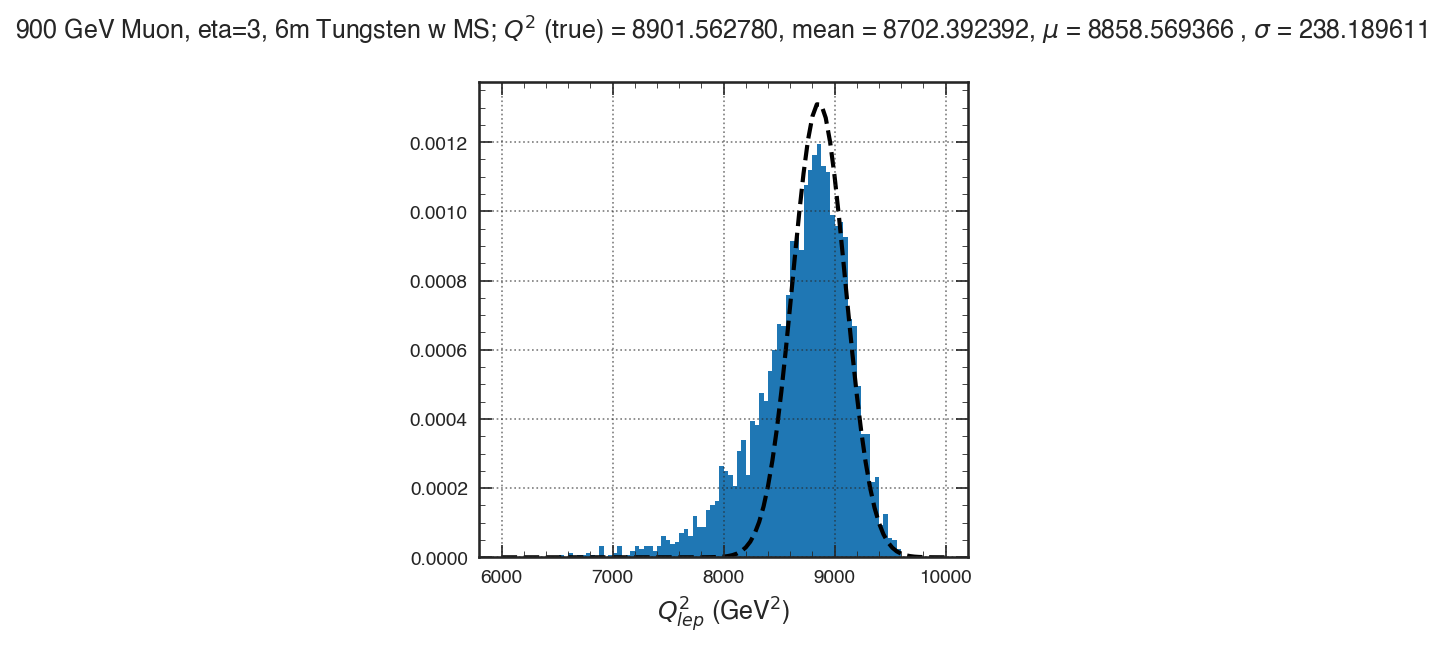

In [2778]:
n, bins, patches = plt.hist(Q2scatt900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('900 GeV Muon, eta=3, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [2779]:
Q2true = Q2Lepton(500., 3.0421, 1000, 275)
Q2plus = Q2Lepton(500., 3.0421-2.*SigmaTheta500, 1000, 275)
Q2minus = Q2Lepton(500., 3.0421+2.*SigmaTheta500, 1000, 275)
Ytrue = YLepton(500., 3.0421, 1000, 275)
print('Q2 true =',Q2true,' Ytrue = ',Ytrue)
print('2 sigma MS window: Q2- = ',Q2minus, ' Q2+ =',Q2plus)


Q2 true = 4945.3126558149925  Ytrue =  0.5012363281639538
2 sigma MS window: Q2- =  4662.542889578458  Q2+ = 5236.385219986706


In [2780]:
lower =2000
upper = 6000
fit_i = 4400
fit_f = 5400
fit = Q2scatt500[(Q2scatt500 >= fit_i) & (Q2scatt500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2scatt500)

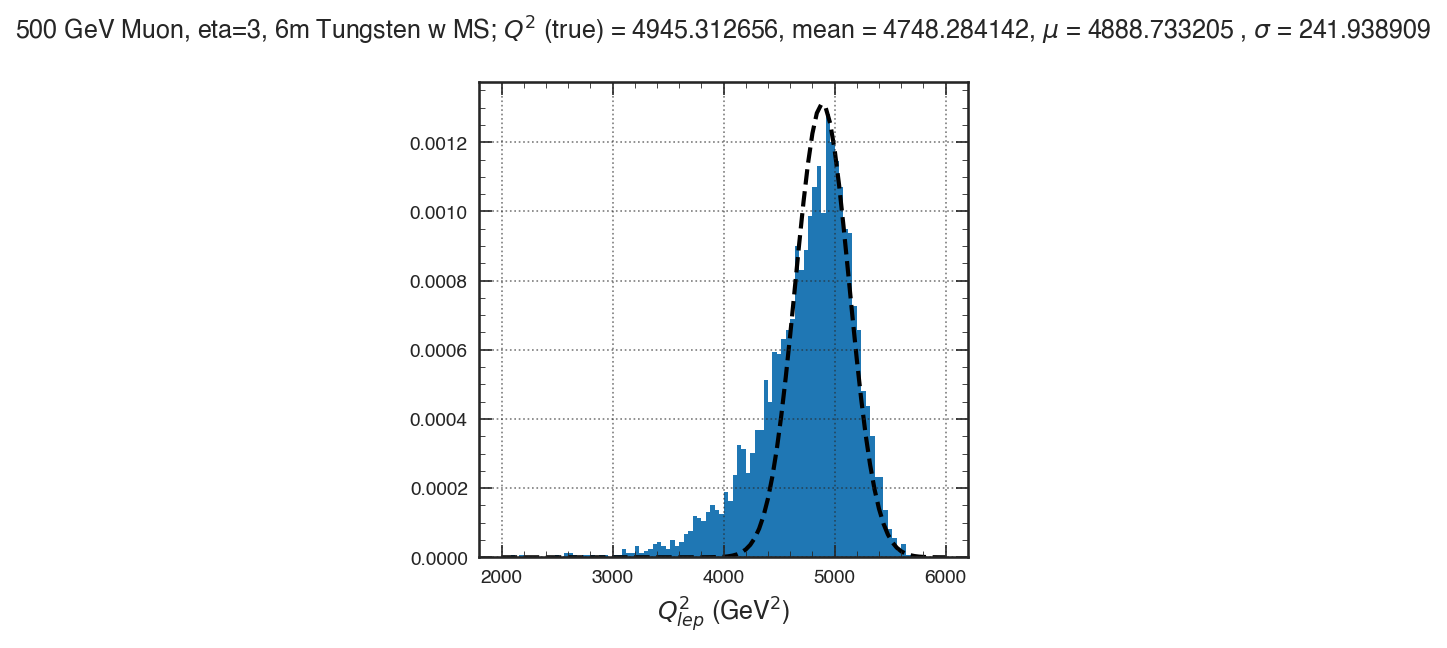

In [2781]:
n, bins, patches = plt.hist(Q2scatt500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('500 GeV Muon, eta=3, 6m Tungsten w MS; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f , $\sigma$ = %f \n' %(Q2true,mean,mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [2782]:
# Now let's try a different way to get at the scattered muon energy from hadronic system using E-Pz

In [2783]:
# 1 TeV incident muon, 900 GeV scattered muon, eta = -6, Sigma is E-pz for hadron system
Sigma = 2*(1000-900)

In [2784]:
# Now smear this value using 25% energy resolution
Resolution = 0.25
Sig900 = np.random.normal(Sigma, Resolution*Sigma, Ntrial)

(array([2.97560106e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.97560106e-05, 5.95120212e-05, 8.92680318e-05, 1.78536064e-04,
        2.38048085e-04, 2.08292074e-04, 7.43900265e-04, 1.04146037e-03,
        1.21999643e-03, 1.63658058e-03, 2.11267675e-03, 2.85657702e-03,
        4.07657345e-03, 4.16584148e-03, 5.05852180e-03, 5.20730185e-03,
        6.96290648e-03, 7.67705073e-03, 7.82583079e-03, 8.00436685e-03,
        7.49851467e-03, 7.55802669e-03, 6.69510238e-03, 6.87363845e-03,
        6.66534637e-03, 4.90974175e-03, 4.28486553e-03, 4.55266962e-03,
        2.64828494e-03, 2.35072484e-03, 1.87462867e-03, 1.07121638e-03,
        1.10097239e-03, 3.86828138e-04, 4.46340159e-04, 1.78536064e-04,
        2.38048085e-04, 1.19024042e-04, 5.95120212e-05, 2.97560106e-05,
        5.95120212e-05]),
 array([ -1.9738175 ,   6.4278464 ,  14.82951029,  23.23117419,
         31.63283809,  40.03450199,  48.43616589,  56.83782979,
         65.23949369,  73.64115759,  82.04282149,  90.

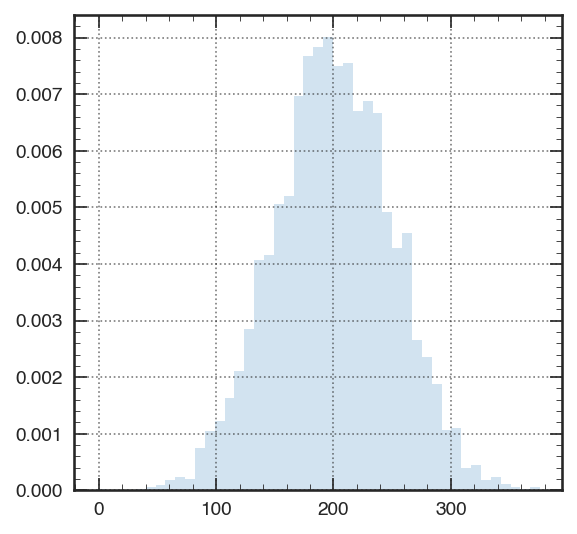

In [2785]:
plt.hist(Sig900, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

In [2786]:
EmuSigma900 = 0.5*(2*1000-Sig900)

In [2787]:
lower =800
upper = 1000
fit_i = 850
fit_f = 950
fit = EmuSigma900[(EmuSigma900 >= fit_i) & (EmuSigma900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(EmuSigma900)

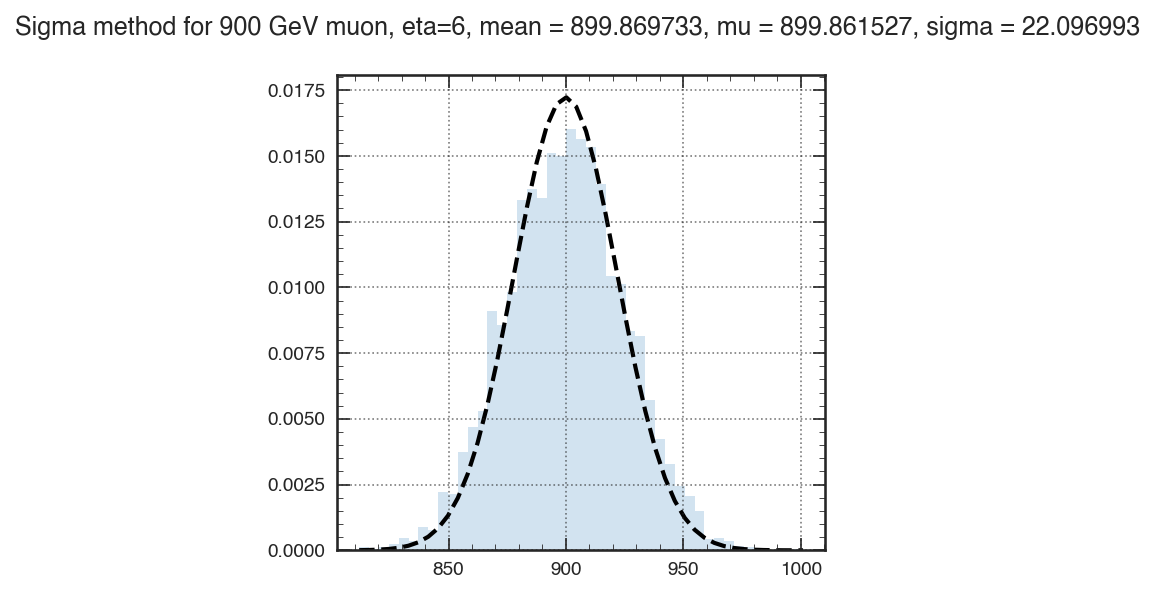

In [2788]:
n, bins, patches = plt.hist(EmuSigma900, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('Sigma method for 900 GeV muon, eta=6, mean = %f, mu = %f, sigma = %f \n' %(mean,mu,sigma), fontsize=12)
plt.show()

In [2789]:
Q2true = Q2Lepton(900., 3.136635, 1000, 275)
Ytrue = YLepton(900., 3.136635, 1000, 275)

In [2790]:
# with angle smearing
Th900 = np.random.normal(3.136635, SigmaTheta900, Ntrial)
Q2Sigma900 = Q2Lepton(EmuSigma900,Th900, 1000, 275)

In [2791]:
lower = 0
upper = 50
fit_i = 10
fit_f = 35.0
fit = Q2Sigma900[(Q2Sigma900 >= fit_i) & (Q2Sigma900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2Sigma900)

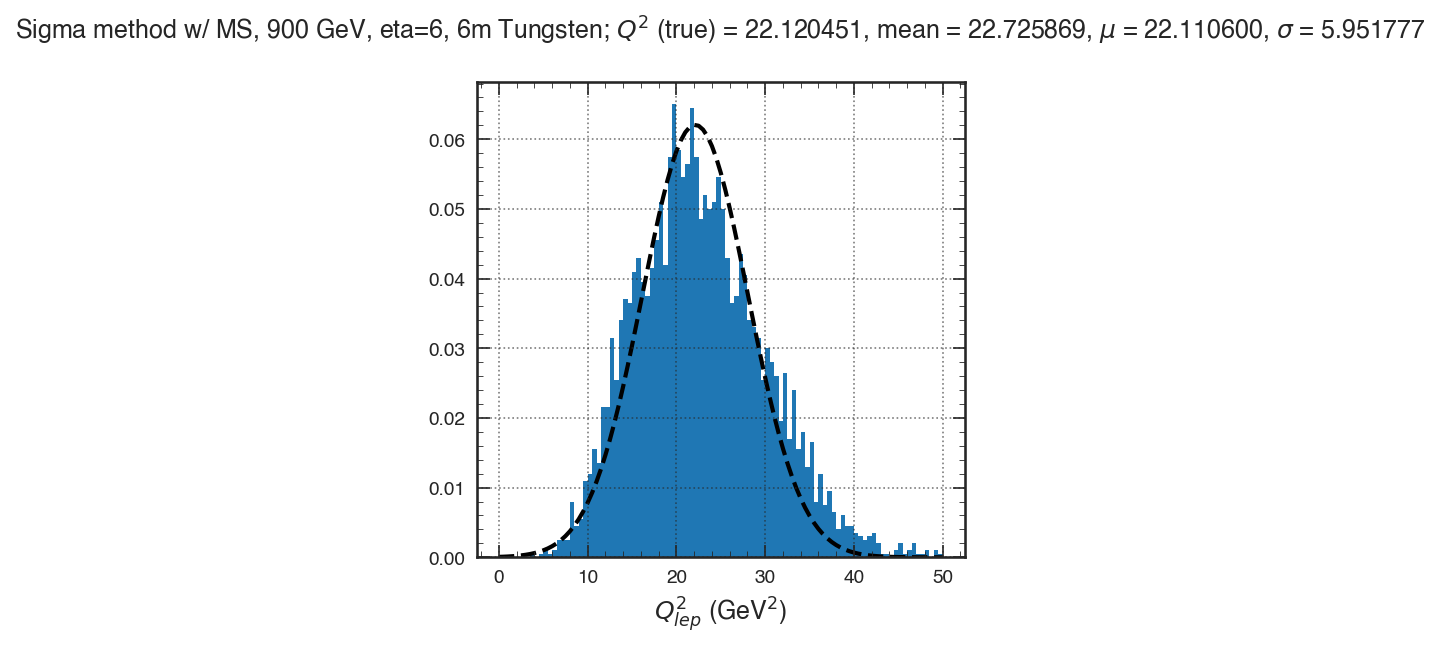

In [2792]:
n, bins, patches = plt.hist(Q2Sigma900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('Sigma method w/ MS, 900 GeV, eta=6, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [2793]:
# very similar to muon variable case *without* any muon momentum smearing
# dominated by angular smearing though

In [2794]:
# Now change to 500 GeV scattered muon, eta = -6
# 1 TeV incident muon, 500 GeV scattered muon, Sigma is E-pz for hadron system
Sigma = 2*(1000-500)

In [2795]:
# Now smear this value using 25% energy resolution
Resolution = 0.25
Sig500 = np.random.normal(Sigma, Resolution*Sigma, Ntrial)

In [2796]:
EmuSigma500 = 0.5*(2*1000-Sig500)

In [2797]:
Q2true = Q2Lepton(500., 3.136635, 1000, 275)
Ytrue = YLepton(500., 3.136635, 1000, 275)

In [2798]:
# with angle smearing
Th500 = np.random.normal(3.136635, SigmaTheta500, Ntrial)
Q2Sigma500 = Q2Lepton(EmuSigma500,Th500, 1000, 275)

In [2799]:
lower = 0
upper = 50
fit_i = 0
fit_f = 20.0
fit = Q2Sigma500[(Q2Sigma500 >= fit_i) & (Q2Sigma500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2Sigma500)

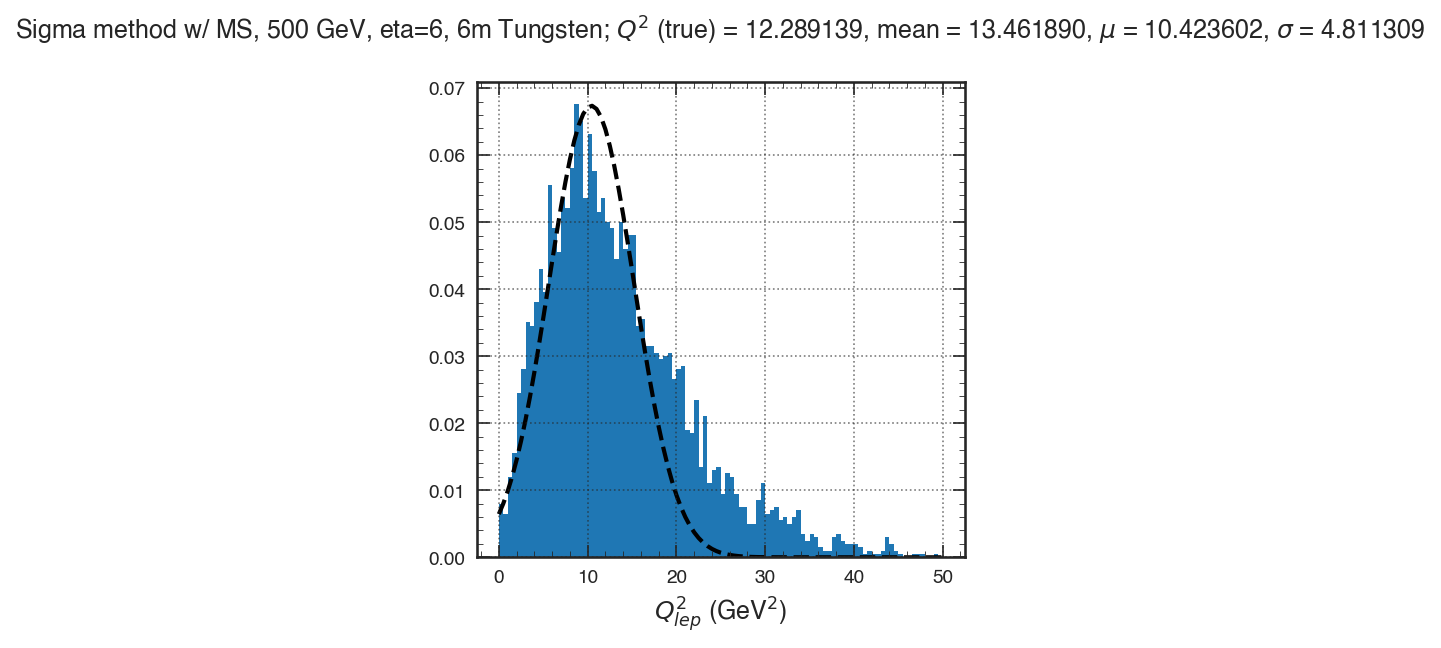

In [2800]:
n, bins, patches = plt.hist(Q2Sigma500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('Sigma method w/ MS, 500 GeV, eta=6, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [2801]:
# Again very similar to lepton method, without energy smearing.
# so 25% smearing of hadron E-pz gives equivalent performance to using muon with energy loss smearing (but no detector smearing)

In [2802]:
# Now let's combine both methods for the energy measurement
# Skip multiple scattering for now, just energy loss to see if better
Ecombine900 = 0.5*(Escatt900+EmuSigma900)

In [2803]:
Q2true = Q2Lepton(900., 3.136635, 1000, 275)
Ytrue = YLepton(900., 3.136635, 1000, 275)
Q2combine900 = Q2Lepton(Ecombine900, 3.136635, 1000, 275)

In [2804]:
lower = 18
upper = 24
fit_i = 21
fit_f = 23.0
fit = Q2combine900[(Q2combine900 >= fit_i) & (Q2combine900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2combine900)

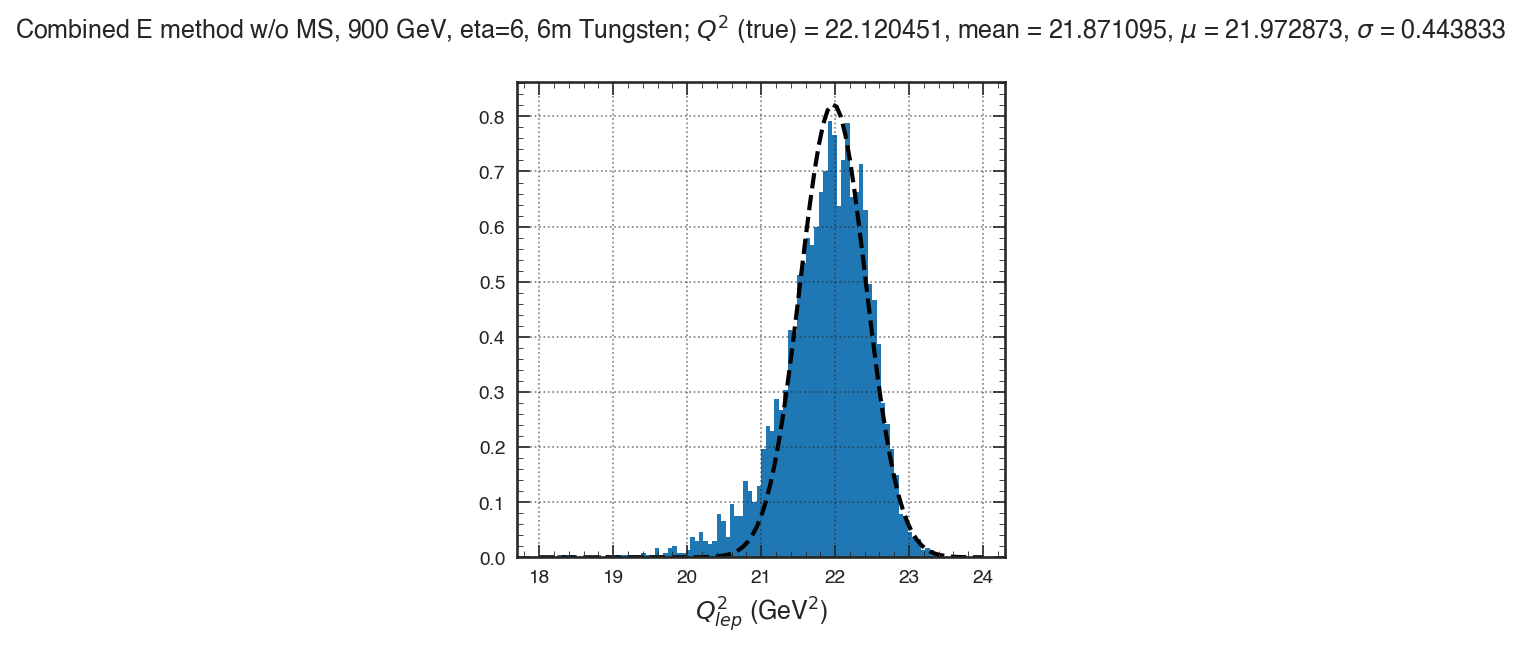

In [2805]:
n, bins, patches = plt.hist(Q2combine900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('Combined E method w/o MS, 900 GeV, eta=6, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [2806]:
# So does get better averaging (not quite by sqrt{2}), but anyway dominated by angular scattering

In [2807]:
# Now try eta=5, back w/ MS
Th900 = np.random.normal(3.12812, SigmaTheta900, Ntrial)
Th500 = np.random.normal(3.12812, SigmaTheta500, Ntrial)

In [2808]:
Q2true = Q2Lepton(900., 3.12812, 1000, 275)
Q2Sigma900 = Q2Lepton(EmuSigma900,Th900, 1000, 275)

In [2809]:
lower = 75
upper = 250
fit_i = 100
fit_f = 200.0
fit = Q2Sigma900[(Q2Sigma900 >= fit_i) & (Q2Sigma900 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2Sigma900)

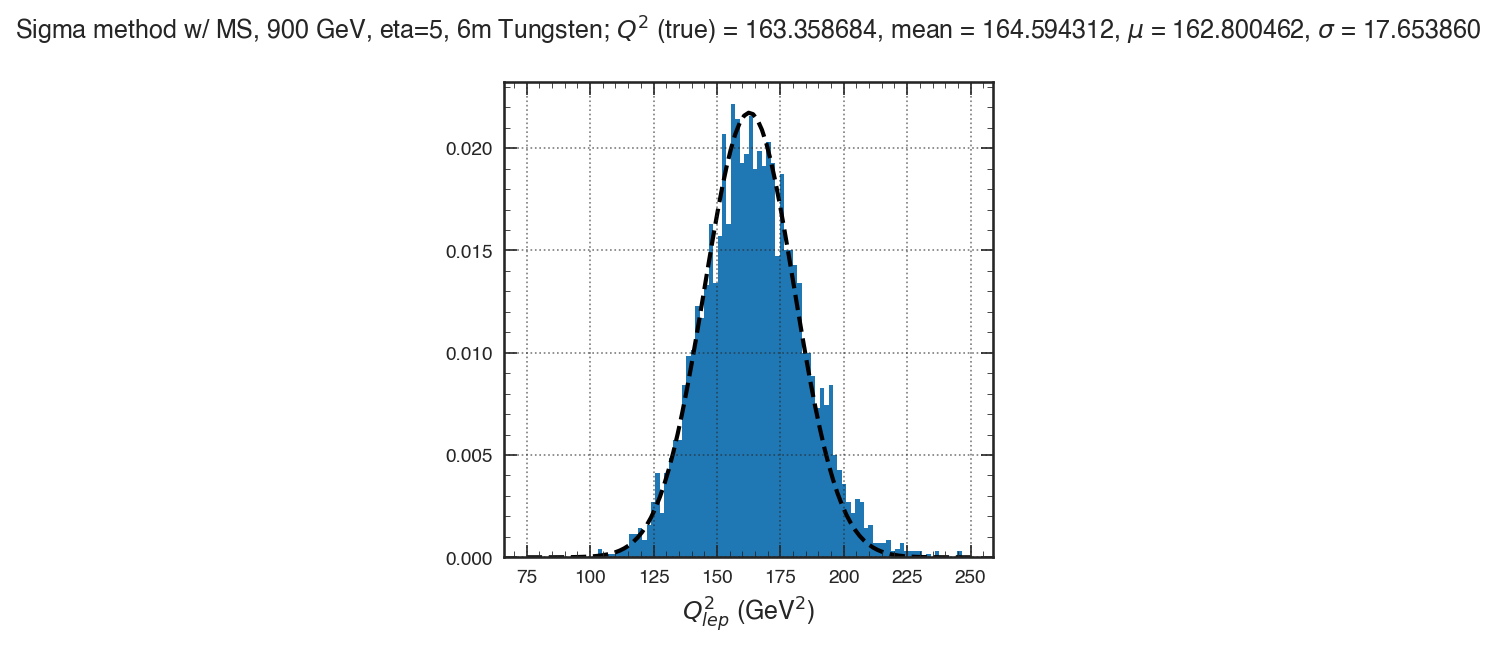

In [2810]:
n, bins, patches = plt.hist(Q2Sigma900, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('Sigma method w/ MS, 900 GeV, eta=5, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()

In [2811]:
Q2true = Q2Lepton(500., 3.12812, 1000, 275)
Q2Sigma500 = Q2Lepton(EmuSigma500,Th500, 1000, 275)

In [2812]:
lower = 0
upper = 200
fit_i = 40
fit_f = 150.0
fit = Q2Sigma500[(Q2Sigma500 >= fit_i) & (Q2Sigma500 <= fit_f)]
(mu, sigma) = norm.fit(fit)
coefficient = len(fit)/len(Q2Sigma500)

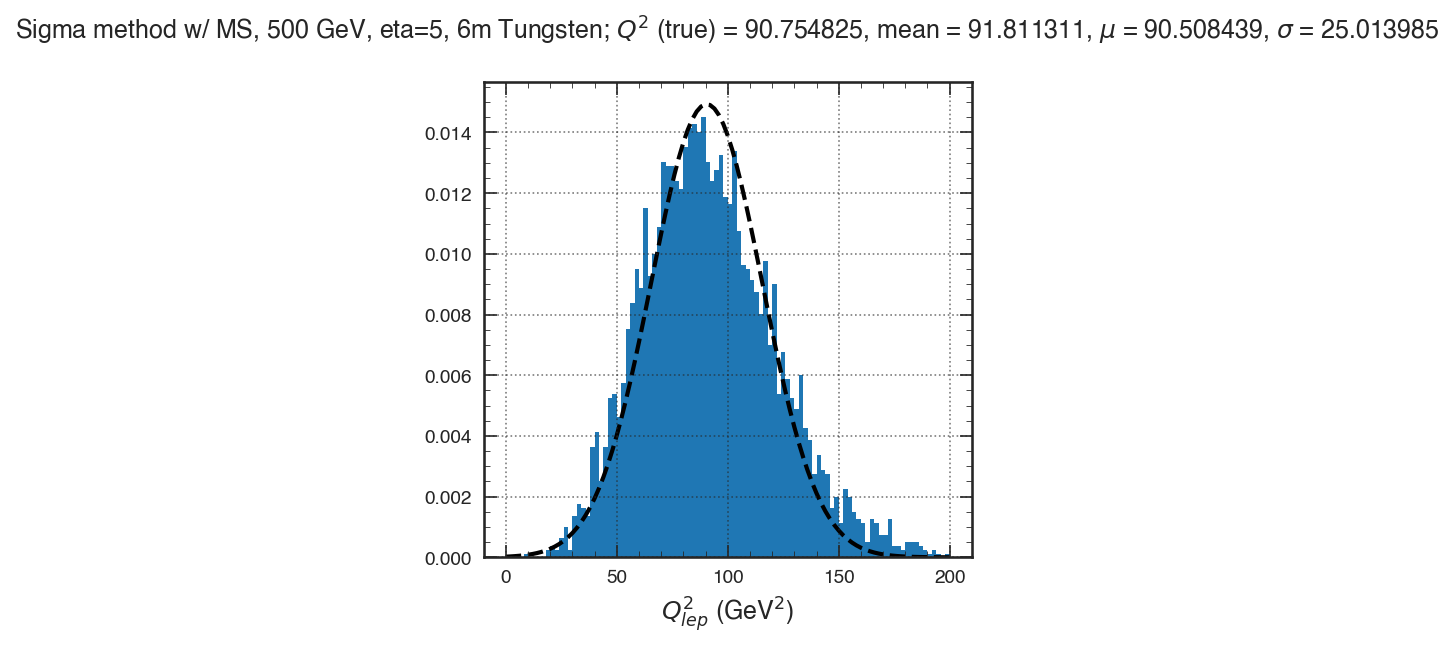

In [2813]:
n, bins, patches = plt.hist(Q2Sigma500, density=True, bins=100, histtype='stepfilled',  range=(lower,upper))
mids = 0.5*(bins[1:] + bins[:-1])
mean = np.average(mids, weights=n)
y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 2)
plt.title('Sigma method w/ MS, 500 GeV, eta=5, 6m Tungsten; $Q^2$ (true) = %f, mean = %f, $\mu$ = %f, $\sigma$ = %f \n' %(Q2true,mean, mu,sigma), fontsize=12)
plt.xlabel('$Q^2_{lep}$ (GeV$^2$)', fontsize = 12)
plt.show()